In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data.dataloader import DataLoader
import numpy as np
from torchvision.models import resnet18

## Download Data and Pretrained Weights

In [2]:
net = resnet18(pretrained=True)

In [3]:
from torchvision.datasets import CIFAR10

In [4]:
cif = CIFAR10('.', download=True, transform=transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()]))
dl = DataLoader(cif)

Files already downloaded and verified


In [5]:
# test network pipeline
for x, y in dl:   
    net(x)
    break

In [6]:
x.shape

torch.Size([1, 3, 224, 224])

## Visualization Pipeline

In [7]:
from visualize_feature import visualize_feats
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [8]:
modules = [('layer4', 0)]
input_args = {'shape': (1, 3, 224, 224)}

In [9]:
imgs = visualize_feats(net, *modules, num_updates=1, **input_args)

In [10]:
img = imgs[0]

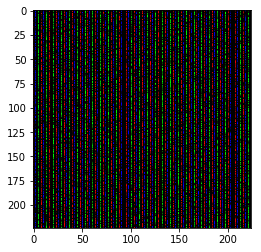

In [11]:
plt.imshow(img)